1. Club with most no. of loaned players. - Done
2. Clubs with most spendings on players - Done
3. Is wage of a player related to club -Done
4. Is wage of a player related to Age - Done
5. Does club choose player based on overall score or International reputaion - Done

In [143]:
#Importing necessary files

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
#importing file
fifa = pd.read_csv("../input/fifa19/data.csv", usecols=['ID','Name','Age', 'Nationality', 'Overall', 'Club', 'Value','Wage', 'International Reputation', 'Loaned From'])

fifa.head()


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,International Reputation,Loaned From
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,5.0,NaN
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,5.0,NaN
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,5.0,NaN
3,193080,De Gea,27,Spain,91,Manchester United,€72M,€260K,4.0,NaN
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,4.0,NaN


In [145]:
#Converting wages to numeric value

fifa["Wage"] = fifa["Wage"].apply(lambda x: x.replace("€",""))
fifa["Wage"] = fifa["Wage"].apply(lambda x: x.replace("K","000"))

fifa = fifa.astype({'Wage': 'int64'})

In [146]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  int64  
 8   International Reputation  18159 non-null  float64
 9   Loaned From               1264 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.4+ MB


In [147]:
#checking for columns with null values
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Club                          241
Value                           0
Wage                            0
International Reputation       48
Loaned From                 16943
dtype: int64

we have majority of null values in the Loaned From but we need not to drop these values as the rows are useful. Also the values in the rows where club and International reputation are null, is useful as it contains information related to other questions.

In [148]:
#defining a function for plotting
def plot_graph(X, Y, num, label_name=None, bar_type='bar'):
    '''
    Function for plotting the graph
    Input:
    X = x-axis values
    Y = y-axis values
    label_name = name of each plot incase for more than 2 bars/line in the same plot
    bar_type = type of plot
    
    Output:
    plotted chart
    '''
    
    if num>1:
        if bar_type=='bar':
            for i in range(num):
                plt.bar(X[i], Y[i], label = label_name[i])
        elif bar_type=='line':
            for i in range(num):
                plt.plot(X[i], Y[i], label = label_name[i])
    else:
        plt.bar(X, Y)
 
    plt.xticks(rotation=90) 
    plt.legend()
    plt.show()

### 1. Club with most no. of loaned players

In [149]:
loaned_player_data = fifa.dropna(subset=['Loaned From']).copy()
loaned_player = loaned_player_data.groupby(by='Club').count()['Loaned From'].sort_values(ascending=False)


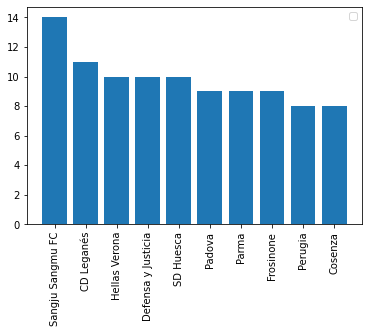

In [150]:
club_names = loaned_player.index.values.tolist()[:10]
number_player = loaned_player.values.tolist()[:10]
plot_graph(club_names, number_player, 1)

### 2. Clubs with most spendings on players

In [151]:
total_wages = pd.DataFrame(fifa.groupby("Club")["Wage"].sum().sort_values(ascending = False))
total = int(total_wages[:10].sum())
total

33926000

In [152]:
wage_list = list(total_wages["Wage"])
size = len(wage_list)-1
count = 0
while total>0:
    total -= wage_list[size-count]
    count += 1
    
count

426

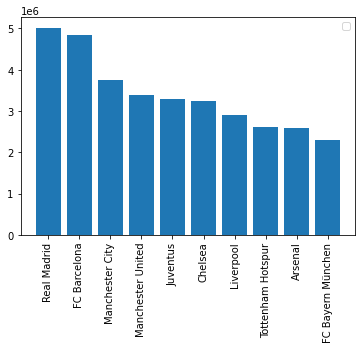

In [153]:
top_wages = pd.DataFrame(fifa.groupby("Club")["Wage"].sum().sort_values(ascending = False))

club_names = top_wages.index.values.tolist()[:10]
wages = [i[0] for i in top_wages.values.tolist()[:10]]
plot_graph(club_names, wages, 1)

### 3. Is wage of a player related to club

In [154]:
#Droping na values for club
fifa.isnull().sum()
fifa.dropna(subset=['Club'], inplace= True)

In [155]:
mean_wage = pd.DataFrame(fifa.groupby("Club")["Wage"].mean().sort_values(ascending = False).head(10)).sort_index()

In [156]:
club_list = list(mean_wage.index)

In [157]:
df_std = fifa[["Club","Wage"]].copy()

#df_std = pd.DataFrame(df_std["Club"].apply(lambda x: x if x in club_list else np.nan))
df_std = df_std[df_std.Club.str.contains('|'.join(club_list))]
#df_std.dropna(inplace = True)
std_wage = pd.DataFrame(df_std.groupby("Club")["Wage"].std().sort_values(ascending = False).head(10)).sort_index()

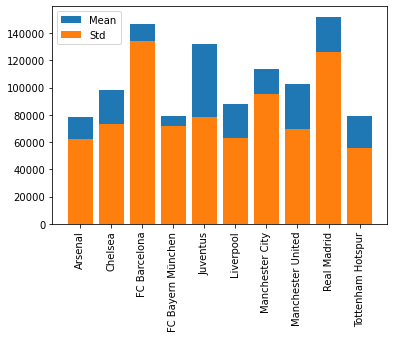

In [158]:
std_club = list(std_wage.index)
mean_club = list(mean_wage.index)
mean_wage = list(mean_wage["Wage"])
std_wage = list(std_wage["Wage"])

plot_graph([mean_club, std_club], [mean_wage, std_wage], 2, label_name=["Mean","Std"])

### 4. Is wage of a player related to Age

In [159]:
age_dataframe_mean = pd.DataFrame(fifa.groupby("Age")["Wage"].mean())
age_dataframe_mean.rename(columns = {'Wage':'Avg_Wage'}, inplace=True)

In [160]:
age_dataframe_std = pd.DataFrame(fifa.groupby("Age")["Wage"].std())
age_dataframe_std.rename(columns = {'Wage':'Std_Wage'}, inplace=True)

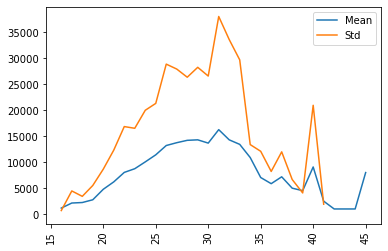

In [161]:
age_mean = list(age_dataframe_mean.index)
age_std = list(age_dataframe_std.index)
wage_mean = list(age_dataframe_mean["Avg_Wage"])
wage_std = list(age_dataframe_std["Std_Wage"])
plot_graph([age_mean, age_std], [wage_mean, wage_std], 2, label_name=["Mean","Std"], bar_type='line')

### 5. Does club choose player based on overall score or International reputaion

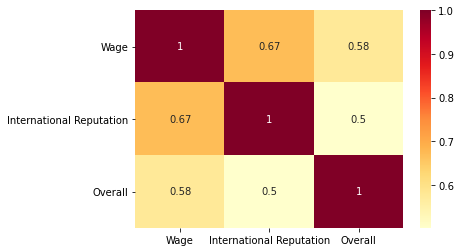

In [162]:
corr = fifa[["Wage","International Reputation", "Overall"]].corr(method ='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True,
           cmap="YlOrRd")